# Importing Modules

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Load dataframe
df = pd.read_csv('/content/drive/MyDrive/DATA/books_10K/books.csv',error_bad_lines= False)
df.head()

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [ ]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [ ]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


# Visualization

In [ ]:
top_fifteen = df[df['ratings_count'] > 1000000]
top_fifteen.sort_values(by='average_rating', ascending=False)
top_fifteen.head(15)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,0618346252,9780618346257,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt
284,865,The Alchemist,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.86,0061122416,9780061122415,eng,197,1631221,55843,5/1/1993,HarperCollins
294,890,Of Mice and Men,John Steinbeck,3.87,0142000671,9780142000670,eng,103,1755253,25554,1/8/2002,Penguin Books
299,930,Memoirs of a Geisha,Arthur Golden,4.11,0739326228,9780739326220,eng,434,1301083,19296,11/15/2005,Random House Large Print Publishing
307,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9781416524793,eng,736,2418736,21303,4/1/2006,Pocket Books
310,968,The Da Vinci Code (Robert Langdon #2),Dan Brown,3.84,0307277674,9780307277671,eng,489,1679706,35877,3/28/2006,Anchor
514,1618,The Curious Incident of the Dog in the Night-Time,Mark Haddon,3.88,1400032717,9781400032716,eng,226,1054308,35537,5/18/2004,Vintage


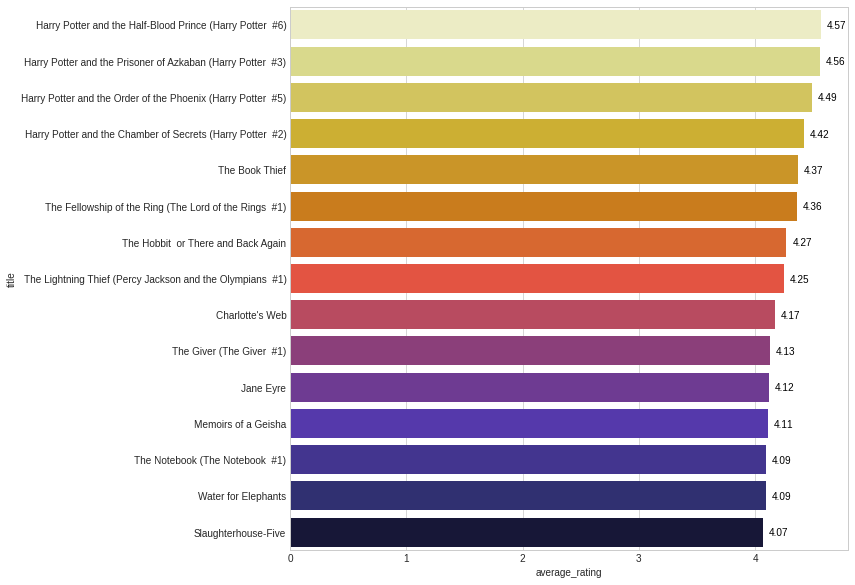

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 10))

data = top_fifteen.sort_values(by='average_rating', ascending=False).head(15)
gr = sns.barplot(x="average_rating", y="title", data=data, palette="CMRmap_r")

for i in gr.patches:
    gr.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

In [ ]:
top_15_authors = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(15).set_index('authors')
top_15_authors.head(15)

,title
authors,
Stephen King,40
P.G. Wodehouse,40
Rumiko Takahashi,39
Orson Scott Card,35
Agatha Christie,33
Piers Anthony,30
Mercedes Lackey,29
Sandra Brown,29
Dick Francis,28


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


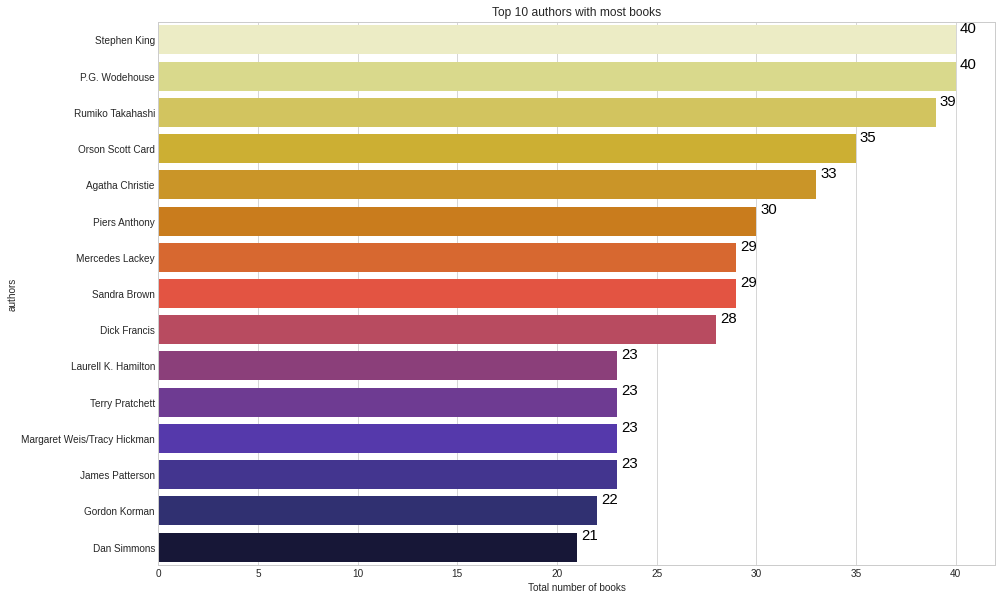

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.barplot(top_15_authors['title'], top_15_authors.index, palette='CMRmap_r')

ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

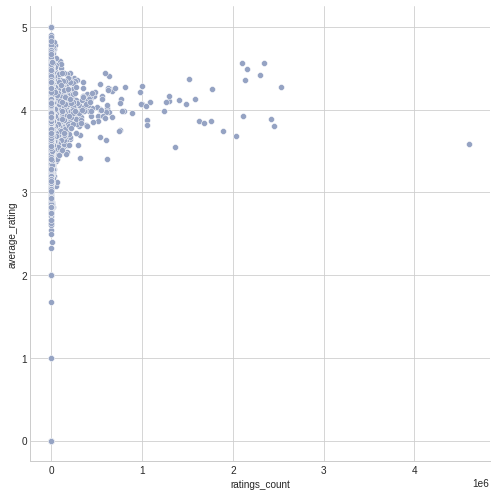

In [ ]:
ax = sns.relplot(data=df,
                 x="ratings_count",
                 y="average_rating",
                 color = '#95a3c3',
                 sizes=(400, 600), 
                 height=7, 
                 marker='o')

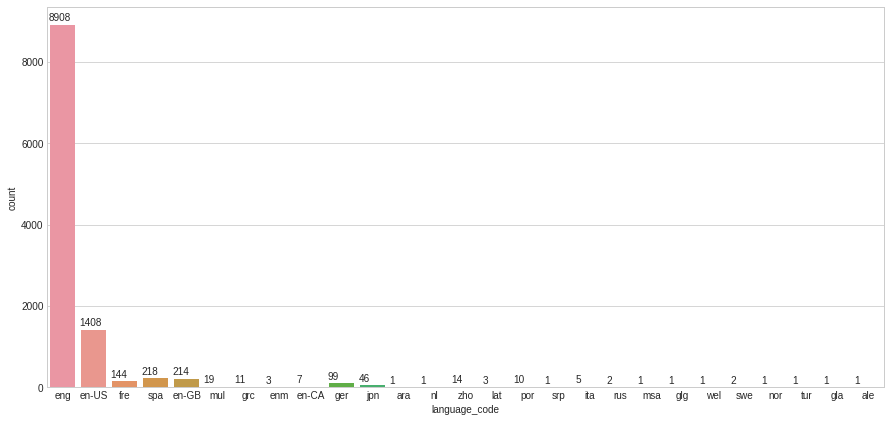

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(x=df.language_code, data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.05, p.get_height()+100))

In [ ]:
top_15_publisher = df.groupby('publisher')['title'].count().reset_index().sort_values('title', ascending=False).head(15).set_index('publisher')
top_15_publisher.head(15)

,title
publisher,
Vintage,318
Penguin Books,261
Penguin Classics,184
Mariner Books,150
Ballantine Books,144
HarperCollins,112
Harper Perennial,112
Pocket Books,111
Bantam,110


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


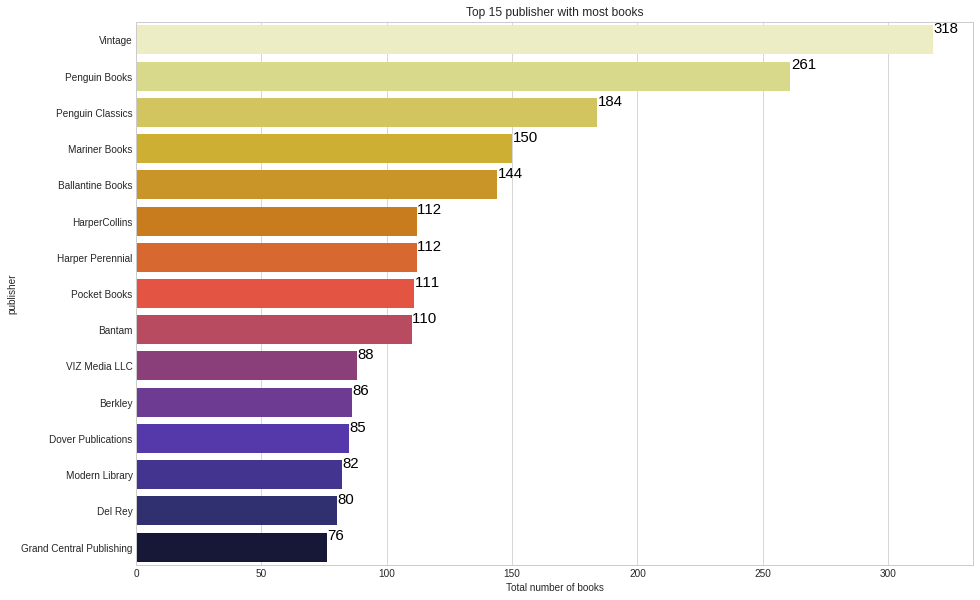

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.barplot(top_15_publisher['title'], top_15_publisher.index, palette='CMRmap_r')

ax.set_title("Top 15 publisher with most books")
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Average rating')

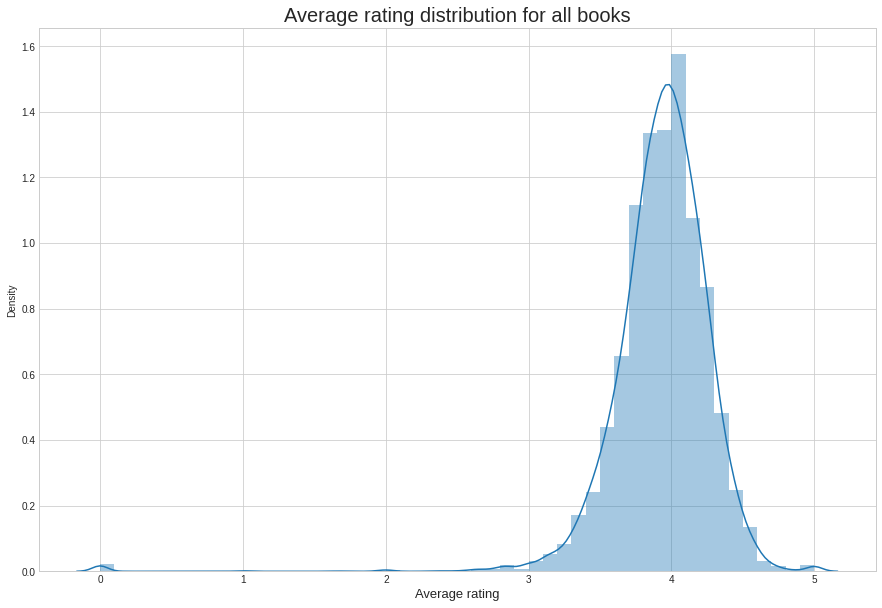

In [ ]:
df.average_rating = df.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(df['average_rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

# Feature Engineering

In [ ]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [ ]:
threshold = 0.7
df = df[df.columns[df.isnull().mean() < threshold]]
df = df.loc[df.isnull().mean(axis=1) < threshold]

In [ ]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


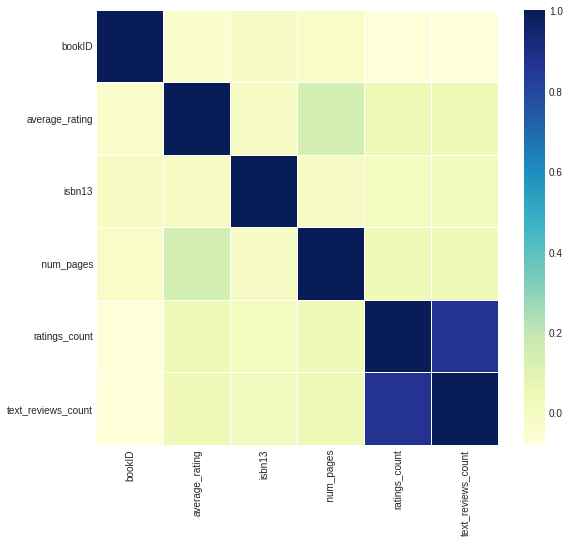

In [ ]:
corrmat = df.corr()   
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [ ]:
df2 =df.copy()

In [ ]:
df2.loc[ (df2['average_rating'] >= 0) & (df2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df2.loc[ (df2['average_rating'] > 1) & (df2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df2.loc[ (df2['average_rating'] > 2) & (df2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df2.loc[ (df2['average_rating'] > 3) & (df2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df2.loc[ (df2['average_rating'] > 4) & (df2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

In [ ]:
df2.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating_between
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,between 4 and 5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,between 4 and 5
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,between 4 and 5
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,between 4 and 5
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,between 4 and 5


In [ ]:
rating_df = pd.get_dummies(df2['rating_between'])
rating_df.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [ ]:
l_code_df = pd.get_dummies(df2['language_code'])
l_code_df.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,glg,grc,ita,jpn,lat,msa,mul,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
features = pd.concat([l_code_df, rating_df, df2['average_rating'], df2['ratings_count']], axis=1)
features.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,glg,grc,ita,jpn,lat,msa,mul,nl,nor,por,rus,spa,srp,swe,tur,wel,zho,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,average_rating,ratings_count
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.57,2095690
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.49,2153167
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.42,6333
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.56,2339585
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.78,41428


# Model Building

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [ ]:
model = neighbors.NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

In [ ]:
idlist

array([[    0,     1,    23,  4415,     3],
       [    1,     0,    23,  4415,     3],
       [    2,  2562,  3101,  3659,  5486],
       ...,
       [11120,  5459,  8599,  4325,  5265],
       [11121,  1463,  8854,  7565,  7079],
       [11122,  6343, 10297,  2646, 11031]])

In [ ]:
def book_recommendation_engine(book_name):
    book_list_name = []
    book_id = df2[df2['publisher'].astype(str).str.contains(book_name)].index
    print(book_id)
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df2.loc[newid].title)
    return book_list_name

In [ ]:
book_list_name = book_recommendation_engine('Scholastic')
book_list_name

Int64Index([    0,     1,     2,     3,     4,     6,   571,   590,   593,
              760,
            ...
             9745,  9746,  9800,  9896, 10396, 10491, 10553, 11035, 11066,
            11084],
           dtype='int64', length=130)


['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
 'The Fellowship of the Ring (The Lord of the Rings  #1)',
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)']

In [ ]:
import pickle

In [ ]:
df2.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating_between
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press,between 4 and 5
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books,between 4 and 5
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books,between 3 and 4
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco,between 3 and 4
11122,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros,between 3 and 4


In [ ]:
df2[df2.isbn == '0609804618']

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating_between
